# Boosted Trees: Overfitting

In this notebook,  we will look at an example for overfitting in boosted trees.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.ensemble

In [2]:
plt.rcParams.update(
    {
        "figure.figsize": (10, 8),
        "axes.titlesize": 20,
        "axes.labelsize": 15,
        "legend.fontsize": 15,
        "axes.grid": True,
        "axes.axisbelow": True,
        "pcolor.shading": "auto",
    }
)

## Data

Five blobs of data for different `x` ranges at different levels for `y`. Variance in each blob is noise, differences in `y` betwen blobs is signal.

This very artificial data set allows us to visualize overfitting in gradient boosting.

In [3]:
N = 100
config = {
    "n": [17, 18, 15, 22, 28],
    "limits": [[10, 15], [20, 25], [0, 5], [30, 32], [13, 17]],
}

In [4]:
y = np.hstack(
    [
        # sample n values, uniform density in limits
        np.random.uniform(
            config["limits"][i][0], config["limits"][i][1], config["n"][i]
        )
        for i in range(len(config["limits"]))
    ]
)
X = np.arange(N)[:, np.newaxis]

<br> 

## Fit, predict and plot (based on `sklearn`)

In [5]:
def plot_fit(**kwargs):
    gbm_sklearn = sklearn.ensemble.GradientBoostingRegressor(**kwargs)
    gbm_sklearn = gbm_sklearn.fit(X, y)
    plt.scatter(X, y)
    plt.plot(X, gbm_sklearn.predict(X), c="darkorange", linewidth=3)
    plt.xlabel("Feature")
    plt.ylabel("y")
    plt.show()

### "Underfitting"

A good model must pick up differences in `y` values between the five blobs. Of course, this is impossible for a model with `max_depth=1`, `max_leaf_nodes=2` and `n_estimators=2`.

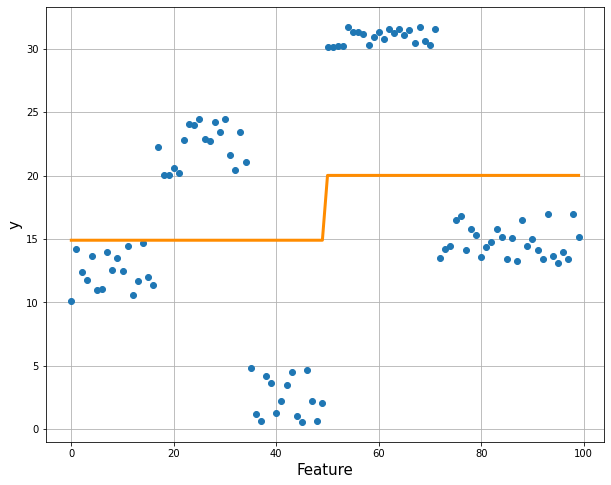

In [6]:
plot_fit(
    learning_rate=0.35,
    n_estimators=2,
    max_depth=1,
    max_leaf_nodes=2,
)

### Good fit

Although the individual trees are not more powerful than the trees in "Underfitting", but the full ensemble (with `n_estimators=100`) can nicely predict the five levels of `y`.

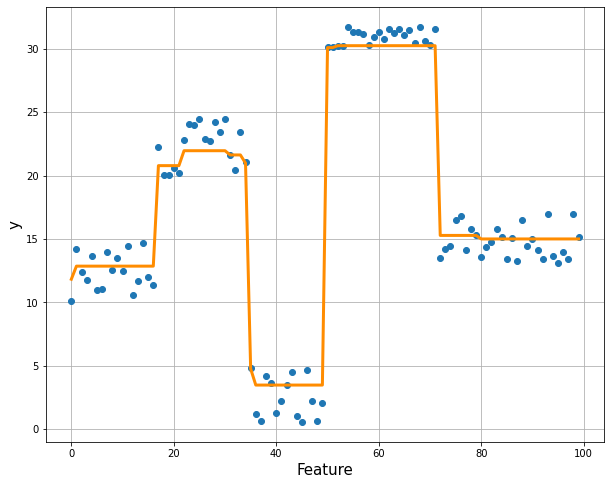

In [7]:
plot_fit(
    learning_rate=0.35,
    n_estimators=100,
    max_depth=1,
    max_leaf_nodes=2,
)

### Overfitting

We know (from the data generating process) that the variation in `y` values within each of the five blobs is noise, so a good model should not pick this up.

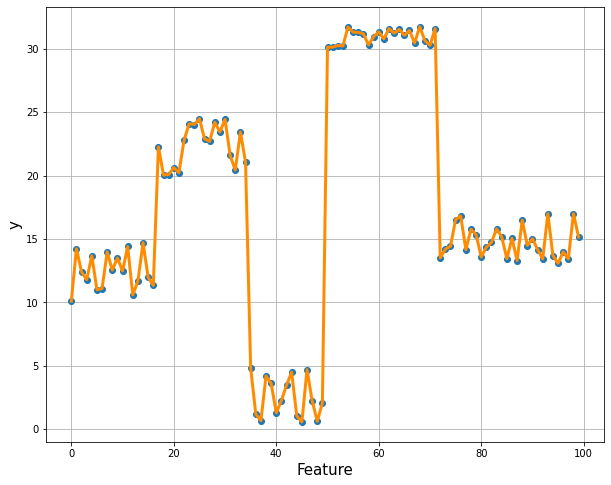

In [8]:
plot_fit(
    learning_rate=0.35,
    n_estimators=100,
    max_depth=5,
    max_leaf_nodes=20,
)

<br>
<br>
&mdash; <br>
Sebastian Gabel <br>
`Learning from Big Data`, Module 2, Lecture 07 <br>
2021/22